In [1]:
## import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# library for SVM and evaluation metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
## view first five rows
df = pd.read_csv('bank-additional-full.csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.loc[(df.y == 'yes'),'y'] = 1
df.loc[(df.y == 'no'),'y']= 0
df['y'] = df['y'].astype(int)

# Split target data 
bank_data = df.iloc[:, :-1]
bank_y = df['y'].astype(int)

In [4]:
# Transform catogorical data using labelencoder
# then scale all data to improve processing time
from sklearn.preprocessing import LabelEncoder,scale

bank_data_obj = bank_data.select_dtypes(include=['object']).columns
print(bank_data_obj)

le = LabelEncoder()
 
for i in bank_data_obj:
    bank_data[i] = le.fit_transform(bank_data[i].astype(str))
    
bank_data = scale(bank_data)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


## Model Fit

In [5]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(bank_data, bank_y, test_size=0.2,
                                                    random_state=7,stratify = bank_y)

In [6]:
# function for output evaluation metrics
def test_output(clf,X_test,Y_test):
    predictions = clf.predict(X_test)
    print('Model performance:')
    
    print('Classfication Report:')
    print(classification_report(Y_test, predictions))
    
    print('Accuracy score: ',accuracy_score(Y_test,predictions))
    print('AUC: ',roc_auc_score(Y_test,predictions))

    print('Confusion Matrix:')
    cm = confusion_matrix(Y_test,predictions,labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()

Model performance:
Classfication Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.69      0.37      0.48       928

    accuracy                           0.91      8238
   macro avg       0.81      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238

Accuracy score:  0.9098082058752124
AUC:  0.6730581336383792
Confusion Matrix:


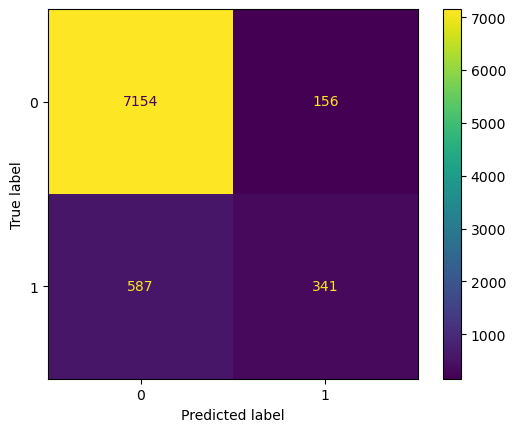

In [7]:
# Fit SVM on the train set
svc = SVC(cache_size = 7000)
svc.fit(X_train, Y_train)

test_output(svc, X_test, Y_test)

Model performance:
Classfication Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     29238
           1       0.75      0.43      0.55      3712

    accuracy                           0.92     32950
   macro avg       0.84      0.71      0.75     32950
weighted avg       0.91      0.92      0.91     32950

Accuracy score:  0.9199393019726859
AUC:  0.7062869035867353
Confusion Matrix:


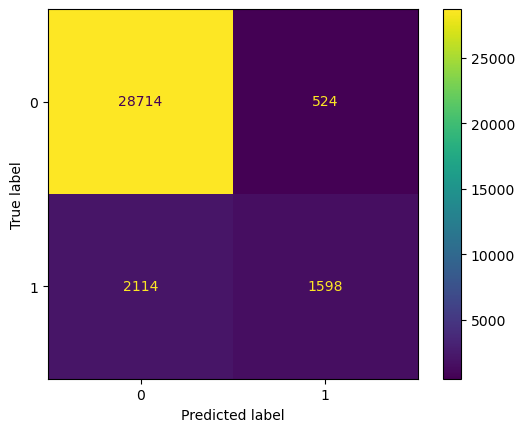

In [8]:
test_output(svc, X_train, Y_train)

## Hyperparameter Tuning

In [9]:
# due to the slow processing time
# splitting the "train-set" into new "train-set" and "validation-set"
X_train2, X_val, Y_train2, Y_val = train_test_split(X_train, Y_train, test_size=0.5, random_state=7)

In [10]:
# Hyper parameter tuning
param_grid = { 'C': [1, 10, 100],
              'gamma': [1, 0.1, 0.01]}

gs_svm = GridSearchCV(svc, param_grid, verbose=2)
gs_svm.fit(X_train2, Y_train2)

print('\nSVM best params:\n', gs_svm.best_params_)
print(gs_svm.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................................C=1, gamma=1; total time= 1.1min
[CV] END .......................................C=1, gamma=1; total time= 1.1min
[CV] END .......................................C=1, gamma=1; total time= 1.1min
[CV] END .......................................C=1, gamma=1; total time= 1.0min
[CV] END .......................................C=1, gamma=1; total time= 1.1min
[CV] END .....................................C=1, gamma=0.1; total time=  13.4s
[CV] END .....................................C=1, gamma=0.1; total time=  14.7s
[CV] END .....................................C=1, gamma=0.1; total time=  13.6s
[CV] END .....................................C=1, gamma=0.1; total time=  13.9s
[CV] END .....................................C=1, gamma=0.1; total time=  14.1s
[CV] END ....................................C=1, gamma=0.01; total time=   7.8s
[CV] END ....................................C=1,